# PROJECT:Customer Churn Prediction

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given csv file
df = pd.read_csv('Telecom_Churn.csv')


In [3]:
#Lets see the first 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Lets check the shape of the data
df.shape
# There are 20 features and 1 Target(Churn) and have 7043 rows

(7043, 21)

In [5]:
# Lets check the datatypes
df.dtypes 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Lets get more information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
#Lets convert the datatype of Total charges column into float
charges = list(df['TotalCharges'])

for i in range(len(charges)) :
    try:
       charges[i] = float(charges[i])
    except :
       charges[i] = np.nan
    
df['TotalCharges']=charges

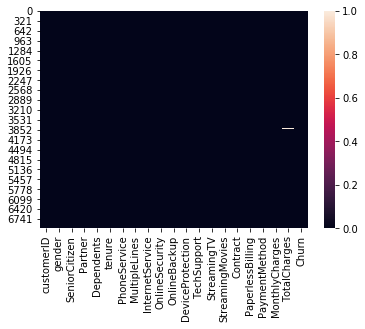

In [8]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()


In [9]:
# Lets confirm about missing value once more
df.isnull().sum()
#There are 11 missing values in total charges column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Lets drop the missing values
df.dropna(inplace=True)

In [11]:
# Lets see the descriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
#Lets see the correlation among data
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


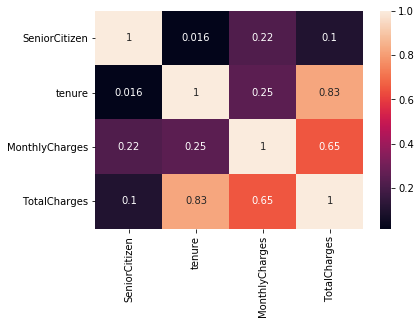

In [13]:
#Lets visualize correlation with help of heat map
sns.heatmap(df.corr(),annot=True)

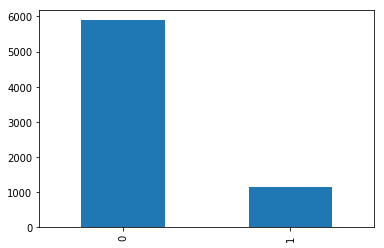

In [14]:
#Lets explore the senior citizen column
df['SeniorCitizen'].value_counts().plot.bar()

In [15]:
#Lets change its datatypes to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [16]:
# Lets see target distribution
df['Churn'].value_counts()
#W can see that dataset is imbalanced

No     5163
Yes    1869
Name: Churn, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007429DD7908>,
      dtype=object)

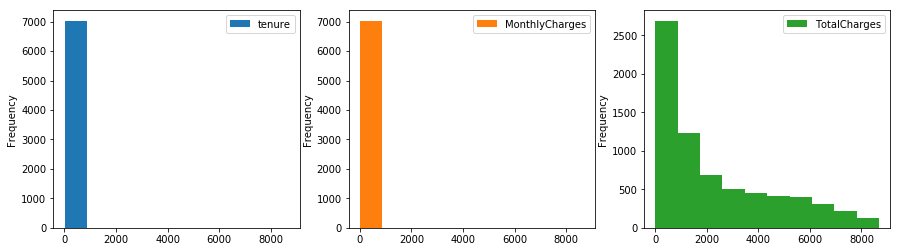

In [17]:
#Lets visualize distribution of  numeric data
df.plot(kind='hist', subplots=True, layout=(1,3), sharex=False, sharey= False, figsize=(15,4))


In [18]:
#We can see the skewness in the data which we will deal soon

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007429E2F048>,
      dtype=object)

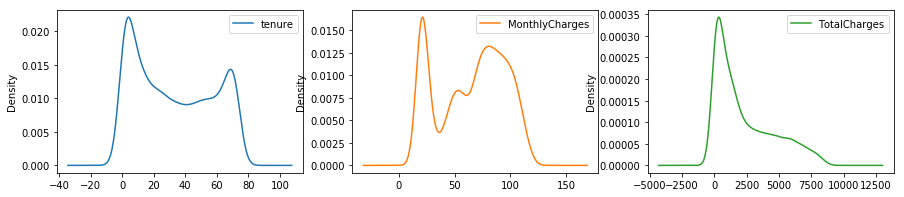

In [19]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(1,3), sharex=False, figsize=(15,3))



tenure               AxesSubplot(0.125,0.125;0.227941x0.755)
MonthlyCharges    AxesSubplot(0.398529,0.125;0.227941x0.755)
TotalCharges      AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

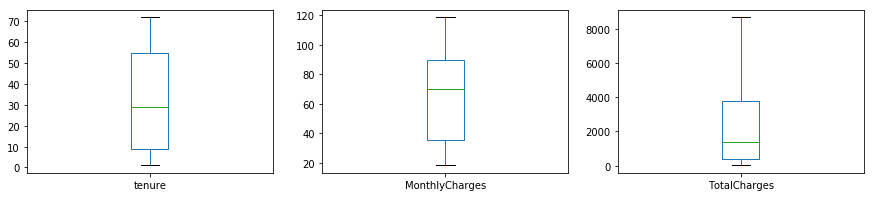

In [20]:
#Lets plot the box plot of each numeric variable in data
df.plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False, figsize=(15,3))


In [21]:
#Lets explore customer id column
df['customerID'].nunique()

7032

In [22]:
# As the customer id is unique for each customer, lets drop it
df.drop('customerID',axis=1,inplace=True)

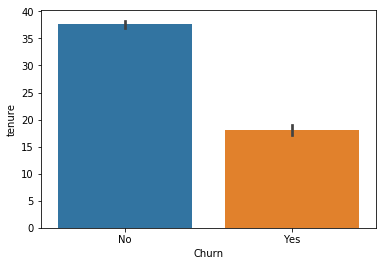

In [23]:
#Lets see the relationship between churn and tenure 
sns.barplot(y='tenure',x='Churn',data=df)

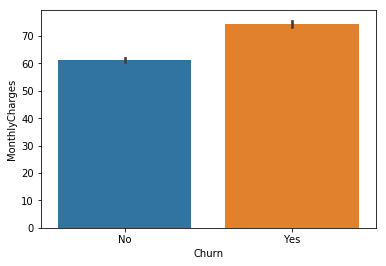

In [24]:
#Lets see the relationship between churn and Monthly charges 
sns.barplot(y='MonthlyCharges',x='Churn',data=df) 

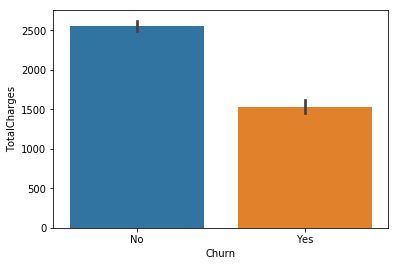

In [25]:
#Lets see the relationship between churn and Total Charges 
sns.barplot(y='TotalCharges',x='Churn',data=df)

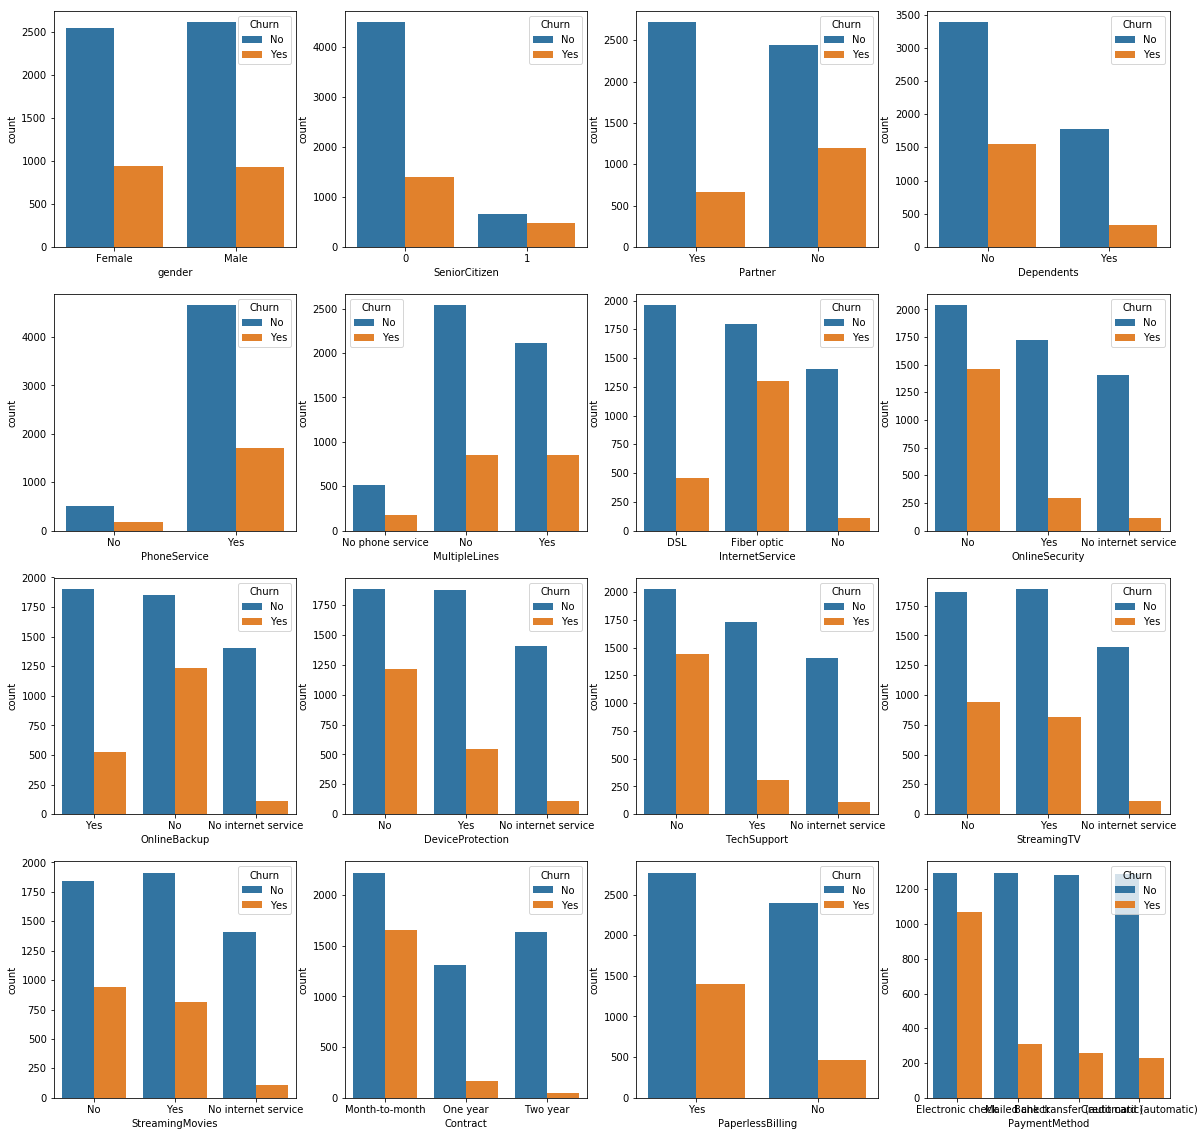

In [26]:
#Lets explore the relation between all categorical variables and  target variable churn
f,axes= plt.subplots(4,4, figsize=(20,20))
sns.countplot(x='gender', hue ='Churn', data=df,ax=axes[0,0])
sns.countplot(x='SeniorCitizen', hue ='Churn', data=df,ax=axes[0,1])
sns.countplot(x='Partner', hue ='Churn', data=df,ax=axes[0,2])
sns.countplot(x='Dependents', hue ='Churn', data=df,ax=axes[0,3])
sns.countplot(x='PhoneService', hue ='Churn', data=df,ax=axes[1,0])
sns.countplot(x='MultipleLines', hue ='Churn', data=df,ax=axes[1,1])
sns.countplot(x='InternetService', hue ='Churn', data=df,ax=axes[1,2])
sns.countplot(x='OnlineSecurity', hue ='Churn', data=df,ax=axes[1,3])
sns.countplot(x='OnlineBackup', hue ='Churn', data=df,ax=axes[2,0])
sns.countplot(x='DeviceProtection', hue ='Churn', data=df,ax=axes[2,1])
sns.countplot(x='TechSupport', hue ='Churn', data=df,ax=axes[2,2])
sns.countplot(x='StreamingTV', hue ='Churn', data=df,ax=axes[2,3])
sns.countplot(x='StreamingMovies', hue ='Churn', data=df,ax=axes[3,0])
sns.countplot(x='Contract', hue ='Churn', data=df,ax=axes[3,1])
sns.countplot(x='PaperlessBilling', hue ='Churn', data=df,ax=axes[3,2])
sns.countplot(x='PaymentMethod', hue ='Churn', data=df,ax=axes[3,3])


In [27]:
#Lets check the skewness 
df.skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [28]:
# Let us reduce the  positive Skewness
df['TotalCharges']=np.log1p(df['TotalCharges'])

In [29]:
#Lets check the skewness again
df.skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges     -0.743089
dtype: float64

In [30]:
#Lets reduce negative skewnes
df['TotalCharges']=np.power(df['TotalCharges'],2)

In [31]:
#Lets check the skewness
df.skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges     -0.352539
dtype: float64

In [32]:
# Lets remove the outliers if any
col1=df[['TotalCharges','tenure','MonthlyCharges']]
from scipy.stats import zscore
z_score =abs(zscore(col1))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were no outliers 

The shape of original dataframe was = (7032, 20)
The shape of dataframe after removing outliers is = (7032, 20)


In [33]:
# Let us seperate the features and Target
x=dfx.drop(['Churn'],axis=1)    
y=dfx[['Churn']]

In [34]:
#Lets see the first five rows of x
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,11.758979
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,56.920938
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,22.021650
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,56.527413
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,25.282269


In [35]:
#Lets see the first five rows of y
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [36]:
#Lets create dummy encoding of categorical variables
x=pd.get_dummies(x,drop_first=True)

In [37]:
#Lets encode the target
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y1 = le.fit_transform(y)
y=pd.DataFrame(y1,columns=['y'])

In [38]:
#lets see first 5 rows of x
x.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,11.758979,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,56.920938,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,22.021650,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,56.527413,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,25.282269,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [39]:
#lets see first 5 rows of y
y.head()

,y
0,0
1,0
2,1
3,0
4,1


In [40]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [41]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [42]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [43]:
#As dataset is imbalanced lets use stratified k fold
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 

In [44]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    cv_results = cross_val_score(model, x, y, cv=skfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.807025 (0.010040)
LDA: 0.803472 (0.009302)
KNN: 0.764081 (0.014221)
DT: 0.719287 (0.012948)
NB: 0.661548 (0.019197)
SVM: 0.801762 (0.011548)


In [45]:
#Lets create a comparison chart
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
0,LR,0.807025
1,LDA,0.803472
5,SVM,0.801762
2,KNN,0.764081
3,DT,0.719287
4,NB,0.661548


In [46]:
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostClassifier(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier(random_state=5))])))  

In [47]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy

results1 = []
names1 = []

for name, model in pipelines1: 
    cv_results1 = cross_val_score(model, x, y, cv=skfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)   

RF: 0.780998 (0.011701)
ADC: 0.804041 (0.010767)
GBC: 0.804467 (0.011122)


In [48]:
#Lets create a comparison chart
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
2,GBC,0.804467
1,ADC,0.804041
0,RF,0.780998


In [49]:
#Lets create a final comparison chart
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
0,LR,0.807025
2,GBC,0.804467
1,ADC,0.804041
1,LDA,0.803472
5,SVM,0.801762
0,RF,0.780998
2,KNN,0.764081
3,DT,0.719287
4,NB,0.661548


In [50]:
# We can see that Gradient Boosting, Logistics regression, LDA, ,SVM and ADC very close in performance
#  Lets select logistics regression as its giving relatively higher accuracy

#Lets try to tune paramters of Logistics Regression  to find better cross val score

In [51]:
#Lets try to check if  cross val performance of Logistics Regression can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
 
scaler = StandardScaler().fit(x)
scaledX = scaler.transform(x)

c_values =  [0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 1,2,3,4,5]
max_iter = [10,20,50,100,200,300,500]
tol=[0.0001,0.01,0.1,0.5,1]
param_grid = dict(C=c_values,max_iter=max_iter,tol=tol)


model = LogisticRegression()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=skfold,n_jobs=-1)
grid_result = grid.fit(scaledX, y)

In [52]:
#Lets check best cross val score
grid_result.best_score_
# There is very very small improvement in skfold accuracy score

0.8080204778156996

In [53]:
#Lets check the best parameters
grid_result.best_params_

{'C': 0.2, 'max_iter': 10, 'tol': 0.5}

In [54]:
#Lets check the best estimator
grid_result.best_estimator_

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.5, verbose=0, warm_start=False)

In [55]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [56]:
#Lets find out the best random state for selected Logistic Regression with best paramters selected

max_accuracy=0
log= LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=10, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, solver='warn', tol=0.5, verbose=0, warm_start=False)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=i,stratify=y)
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    log.fit(X_train,y_train)
    ypreds=log.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.8024164889836531
At random state  2 the value of accuracy is  0.7974413646055437
At random state  3 the value of accuracy is  0.7931769722814499
At random state  4 the value of accuracy is  0.798862828713575
At random state  5 the value of accuracy is  0.7910447761194029
At random state  6 the value of accuracy is  0.8052594171997157
At random state  7 the value of accuracy is  0.8194740582800284
At random state  8 the value of accuracy is  0.798862828713575
At random state  9 the value of accuracy is  0.8038379530916845
At random state  10 the value of accuracy is  0.8109452736318408
At random state  11 the value of accuracy is  0.8123667377398721
At random state  12 the value of accuracy is  0.8102345415778252
At random state  13 the value of accuracy is  0.8244491826581379
At random state  14 the value of accuracy is  0.8251599147121536
At random state  15 the value of accuracy is  0.8152096659559346
At random state  16 the value of acc

In [57]:
#Lets once again verify its  cross val  accuracy score
mymod= LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=10, multi_class='warn',n_jobs=None, penalty='l2', random_state=None, solver='warn',tol=0.5, verbose=0, warm_start=False)
cross_val_score(mymod,scaledX,y,cv=skfold,scoring="accuracy").mean()

0.8080205383659329

In [58]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 52,stratify=y)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
lr=LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=10, multi_class='warn',n_jobs=None, penalty='l2', random_state=None, solver='warn',tol=0.5, verbose=0, warm_start=False)
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 0.8265813788201848


In [59]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('LR_CHURN_prediction.csv')

In [60]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[954  79]
 [165 209]]


In [61]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))

classification report =                precision    recall  f1-score   support

           0       0.85      0.92      0.89      1033
           1       0.73      0.56      0.63       374

   micro avg       0.83      0.83      0.83      1407
   macro avg       0.79      0.74      0.76      1407
weighted avg       0.82      0.83      0.82      1407



AUC: 0.741


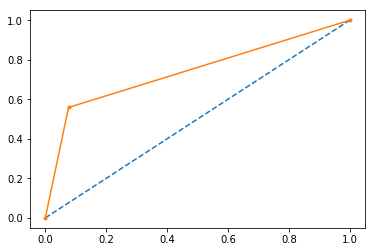

In [62]:
# calculate AUC
auc = roc_auc_score(y_test, ypred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [63]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(lr,'LR_CHURN.pkl')

['LR_CHURN.pkl']